In [1]:
# blanket import modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint
from scipy.stats import linregress

In [2]:
# setting up paths for data
happy_cs = "../Resources/World Happiness Report 2022.csv"
happy_df = pd.read_csv(happy_cs)
got_bars_h = happy_df.head(5)
got_bars_t = happy_df.tail(5)
got_bars = got_bars_h.append(got_bars_t, ignore_index=True)
got_bars

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
5,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
6,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
7,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
8,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
9,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005


In [3]:
x_axis = np.arange(len(got_bars["Country"]))
y1 = got_bars["Explained by: GDP per capita"]
y2 = got_bars["Explained by: Social support"]
y3 = got_bars["Explained by: Healthy life expectancy"]
y4 = got_bars["Explained by: Freedom to make life choices"]
y5 = got_bars["Explained by: Generosity"]
y6 = got_bars["Explained by: Perceptions of corruption"]

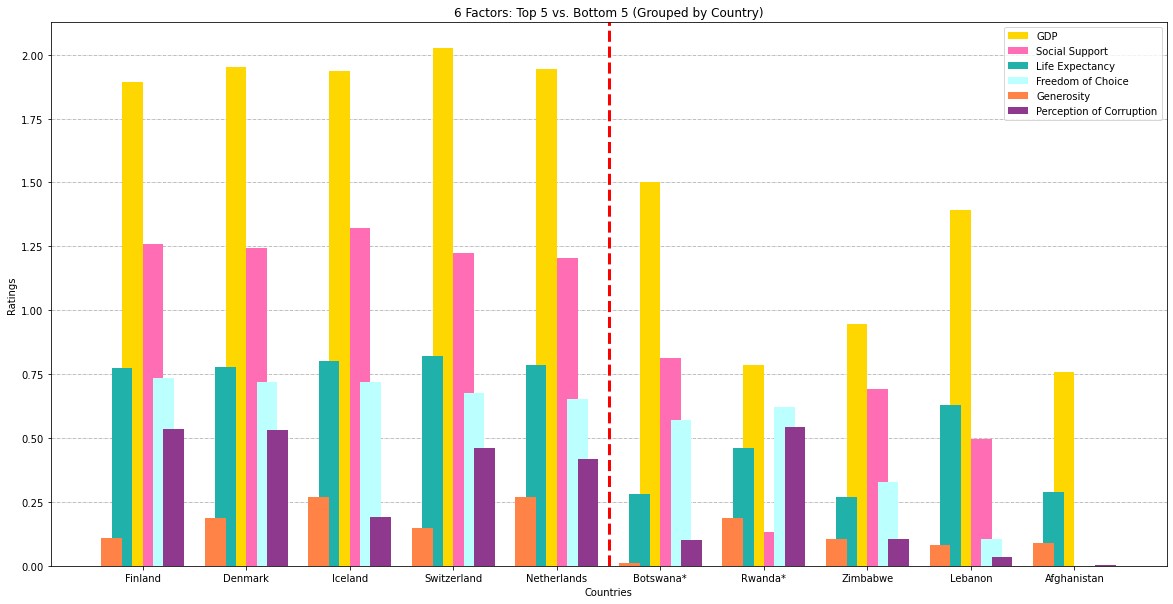

In [4]:
plt.figure(figsize=(20,10))
plt.xticks(x_axis, got_bars["Country"])
plt.xlabel("Countries")
plt.ylabel("Ratings")
plt.title("6 Factors: Top 5 vs. Bottom 5 (Grouped by Country)")

b1 = plt.bar(x_axis - 0.1, y1, 0.2, color = "#FFD700", zorder = 4)
b2 = plt.bar(x_axis + 0.1, y2, 0.2, color = "#FF6EB4", zorder = 4)
b3 = plt.bar(x_axis - 0.2, y3, 0.2, color = "#20B2AA", zorder = 4)
b4 = plt.bar(x_axis + 0.2, y4, 0.2, color = "#BBFFFF", zorder = 4)
b5 = plt.bar(x_axis - 0.3, y5, 0.2, color = "#FF8247", zorder = 4)
b6 = plt.bar(x_axis + 0.3, y6, 0.2, color = "#8E388E", zorder = 4)

plt.axvline(4.5, 0, 1, linewidth=3, linestyle="--", color="#FF0000")

plt.legend((b1, b2, b3, b4, b5, b6), 
           ("GDP","Social Support","Life Expectancy","Freedom of Choice","Generosity","Perception of Corruption"))

plt.grid(axis="y", zorder = 0, color = "grey", linewidth = ".5", linestyle = "-.")

plt.savefig("Images/6_Factors_by_Country.png")
plt.show()

In [5]:
got_bars_e = got_bars.loc[: , ["Country", "Explained by: GDP per capita", "Explained by: Social support",
                               "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices",
                              "Explained by: Generosity", "Explained by: Perceptions of corruption"]]

got_bars_e = got_bars_e.set_index("Country")
got_bars_e = got_bars_e.transpose()
got_bars_e

Country,Finland,Denmark,Iceland,Switzerland,Netherlands,Botswana*,Rwanda*,Zimbabwe,Lebanon,Afghanistan
Explained by: GDP per capita,1.892,1.953,1.936,2.026,1.945,1.503,0.785,0.947,1.392,0.758
Explained by: Social support,1.258,1.243,1.320,1.226,1.206,0.815,0.133,0.690,0.498,0.000
Explained by: Healthy life expectancy,0.775,0.777,0.803,0.822,0.787,0.280,0.462,0.270,0.631,0.289
Explained by: Freedom to make life choices,0.736,0.719,0.718,0.677,0.651,0.571,0.621,0.329,0.103,0.000
Explained by: Generosity,0.109,0.188,0.270,0.147,0.271,0.012,0.187,0.106,0.082,0.089
Explained by: Perceptions of corruption,0.534,0.532,0.191,0.461,0.419,0.102,0.544,0.105,0.034,0.005


In [6]:
x_vals = ["Explained by: GDP per capita", "Explained by: Social support",
                               "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices",
                              "Explained by: Generosity", "Explained by: Perceptions of corruption"]
x_axis = np.arange(len(x_vals))
y1 = got_bars_e["Finland"]
y2 = got_bars_e["Denmark"]
y3 = got_bars_e["Iceland"]
y4 = got_bars_e["Switzerland"]
y5 = got_bars_e["Netherlands"]
y6 = got_bars_e["Botswana*"]
y7 = got_bars_e["Rwanda*"]
y8 = got_bars_e["Zimbabwe"]
y9 = got_bars_e["Lebanon"]
y10 = got_bars_e["Afghanistan"]

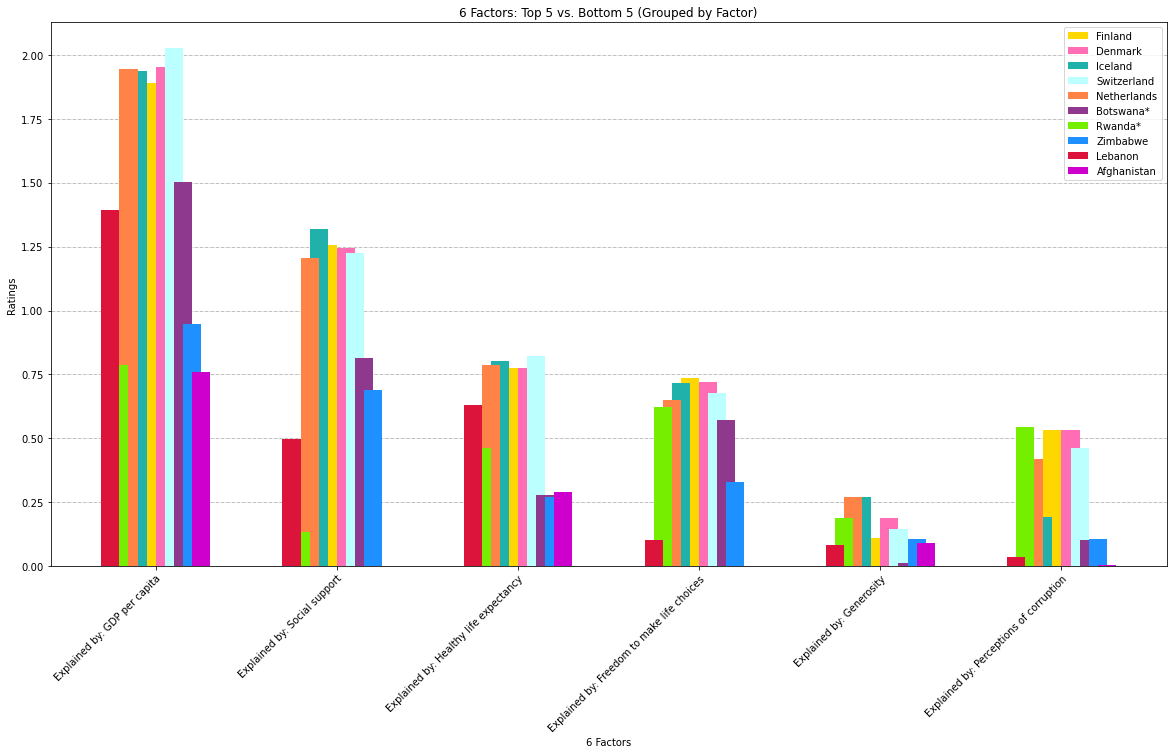

In [7]:
plt.figure(figsize=(20,10))
plt.xticks(x_axis, x_vals, rotation = 45, ha="right", rotation_mode="anchor")
plt.xlabel("6 Factors")
plt.ylabel("Ratings")
plt.title("6 Factors: Top 5 vs. Bottom 5 (Grouped by Factor)")


b1 = plt.bar(x_axis - 0.05, y1, 0.1, color = "#FFD700", zorder = 4)
b2 = plt.bar(x_axis + 0.05, y2, 0.1, color = "#FF6EB4", zorder = 4)
b3 = plt.bar(x_axis - 0.1, y3, 0.1, color = "#20B2AA", zorder = 4)
b4 = plt.bar(x_axis + 0.1, y4, 0.1, color = "#BBFFFF", zorder = 4)
b5 = plt.bar(x_axis - 0.15, y5, 0.1, color = "#FF8247", zorder = 4)
b6 = plt.bar(x_axis + 0.15, y6, 0.1, color = "#8E388E", zorder = 4)
b7 = plt.bar(x_axis - 0.2, y7, 0.1, color = "#76EE00", zorder = 4)
b8 = plt.bar(x_axis + 0.2, y8, 0.1, color = "#1E90FF", zorder = 4)
b9 = plt.bar(x_axis - 0.25, y9, 0.1, color = "#DC143C", zorder = 4)
b10 = plt.bar(x_axis + 0.25, y10, 0.1, color = "#CD00CD", zorder = 4)

#plt.axvline(4.5, 0, 1, linewidth=3, linestyle="--", color="#FF0000")

plt.legend((b1, b2, b3, b4, b5, b6, b7, b8, b9, b10), 
           ("Finland","Denmark","Iceland","Switzerland","Netherlands","Botswana*", "Rwanda*", "Zimbabwe", 
            "Lebanon", "Afghanistan"))

plt.grid(axis="y", zorder = 0, color = "grey", linewidth = ".5", linestyle = "-.")

plt.savefig("Images/6_Factors_by_Factor.png")
plt.show()